# Validação COVID - Dados Fio Cruz

## Carregando Bibliotecas

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

## Carregando dados

In [24]:
# Carregando lista de arquivos .tsv
path = os.getcwd()
tsv_files = glob.glob(os.path.join(path, "*.tsv"))

# Carregando arquivos em uma lista de dataframes
df_list = []
for f in tsv_files: 

    df_list.append(pd.read_csv(f, sep='\t'))


# Juntando dados em um único dataframe
df = pd.concat(df_list)


## Tratamento de dados 

In [25]:
# Tranformando datas em tipo date 
df[["Collection date", "Submission date"]] = df[["Collection date", "Submission date"]].apply(pd.to_datetime)	

In [26]:
# Separando colunas de localidade
df[['continent','country','state','municipality']] = df['Location'].str.split(' / ', expand = True)

# Adicionando código do IBGE no estado e município
#TODO

## Analise exploratória dos dados

In [27]:
df

,Accession ID,Collection date,Submission date,Location,continent,country,state,municipality
0,EPI_ISL_15440614,2021-08-23,2022-10-20,South America / Brazil / Piaui,South America,Brazil,Piaui,None
1,EPI_ISL_15440610,2021-08-23,2022-10-20,South America / Brazil / Piaui,South America,Brazil,Piaui,None
2,EPI_ISL_15440619,2021-08-21,2022-10-20,South America / Brazil / Piaui,South America,Brazil,Piaui,None
3,EPI_ISL_15440598,2021-08-19,2022-10-20,South America / Brazil / Piaui,South America,Brazil,Piaui,None
4,EPI_ISL_15440615,2021-08-23,2022-10-20,South America / Brazil / Piaui,South America,Brazil,Piaui,None
...,...,...,...,...,...,...,...,...
9995,EPI_ISL_5254432,2021-09-18,2021-10-17,South America / Brazil / Pernambuco / Recife,South America,Brazil,Pernambuco,Recife
9996,EPI_ISL_5254435,2021-09-20,2021-10-17,South America / Brazil / Pernambuco / São Caitano,South America,Brazil,Pernambuco,São Caitano
9997,EPI_ISL_5254436,2021-08-31,2021-10-17,South America / Brazil / Alagoas / Palmeira do...,South America,Brazil,Alagoas,Palmeira dos Índios
9998,EPI_ISL_5254441,2021-08-19,2021-10-17,South America / Brazil / Pernambuco / Moreno,South America,Brazil,Pernambuco,Moreno


In [28]:
# Verificando se existem registros repetidos
df["Accession ID"].duplicated().value_counts()

False    53831
Name: Accession ID, dtype: int64

### Analise de distribuicao dos dados por estado e município

In [29]:
df["continent"].value_counts()

South America    53831
Name: continent, dtype: int64

In [30]:
df["country"].value_counts()

Brazil    53831
Name: country, dtype: int64

#### Estado

In [31]:
#Valor absoluto
df["state"].value_counts()

Sao Paulo              26832
Rio de Janeiro          5205
Parana                  3041
Amazonas                2485
Goias                   2433
Bahia                   1773
Ceara                   1703
Pernambuco              1507
Rio Grande do Sul       1308
Santa Catarina           841
Minas Gerais             834
Para                     672
Rio Grande do Norte      640
Alagoas                  567
Mato Grosso do Sul       546
Espirito Santo           483
Maranhao                 417
Federal District         363
Sergipe                  307
Amapa                    292
Tocantins                288
Paraiba                  277
Roraima                  265
Mato Grosso              259
Acre                     172
Piaui                    171
Rondonia                 150
Name: state, dtype: int64

In [32]:
#Percentual
df["state"].value_counts()*100/df.shape[0]

Sao Paulo              49.844885
Rio de Janeiro          9.669150
Parana                  5.649161
Amazonas                4.616299
Goias                   4.519701
Bahia                   3.293641
Ceara                   3.163605
Pernambuco              2.799502
Rio Grande do Sul       2.429827
Santa Catarina          1.562297
Minas Gerais            1.549293
Para                    1.248351
Rio Grande do Norte     1.188906
Alagoas                 1.053296
Mato Grosso do Sul      1.014285
Espirito Santo          0.897253
Maranhao                0.774647
Federal District        0.674333
Sergipe                 0.570303
Amapa                   0.542438
Tocantins               0.535008
Paraiba                 0.514573
Roraima                 0.492281
Mato Grosso             0.481135
Acre                    0.319518
Piaui                   0.317661
Rondonia                0.278650
Name: state, dtype: float64

#### Município

In [33]:
#Verificando quantos não possuem munícipio anotado
df['municipality'].isna().value_counts()

True     27975
False    25856
Name: municipality, dtype: int64

Obs.: Aproximadamente metade dos registros não possuem município anotado

In [34]:
#Principais registros de município
pd.DataFrame(df['municipality'].value_counts()).head(20)

,municipality
Manaus,1903
Aparecida de Goiania,1589
Rio de Janeiro,1232
Curitiba,795
Fortaleza,749
Irece,476
Salvador,403
Sao Jose do Rio Preto,356
Caruaru,308
Sao Paulo,301


In [35]:
#Percetual de municípios anotados por estado

count_na = df[df['municipality'].isna()].groupby('state').count()['country']
count_total = df.groupby('state').count()['country']
df_perc_nan = pd.DataFrame(count_na*100/count_total).reset_index().rename(columns={"country": "percentual_nan"})
df_perc_nan.sort_values('percentual_nan', ascending=False)

,state,percentual_nan
7,Federal District,90.909091
24,Sao Paulo,85.692457
19,Rio Grande do Sul,40.978593
17,Piaui,38.596491
11,Mato Grosso do Sul,36.813187
15,Parana,31.075304
10,Mato Grosso,30.501931
4,Bahia,29.554428
9,Maranhao,27.817746
12,Minas Gerais,26.858513


### Analise de notificações no tempo

In [36]:
df_time = pd.DataFrame(df.groupby('Collection date').count()['Accession ID']).reset_index().rename(columns={"Accession ID": "number_cases"})

<AxesSubplot: xlabel='Collection date', ylabel='number_cases'>

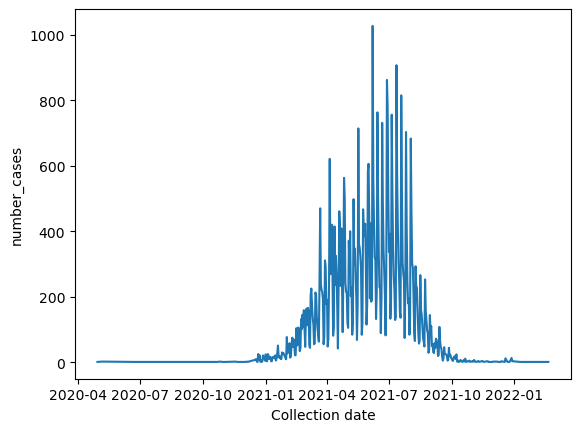

In [37]:
sns.lineplot(data=df_time, x="Collection date", y="number_cases")

In [38]:
#Numero de casos indentificados antes de 01 de janeiro de 2021
#Isso está correto
df[df['Collection date'] < '2021-01-06'].sort_values(by='Collection date').head(30) 

,Accession ID,Collection date,Submission date,Location,continent,country,state,municipality
1384,EPI_ISL_15977585,2020-04-29,2022-12-01,South America / Brazil / Rio de Janeiro,South America,Brazil,Rio de Janeiro,None
9788,EPI_ISL_11359363,2020-05-06,2022-03-24,South America / Brazil / Para / Belem,South America,Brazil,Para,Belem
8267,EPI_ISL_11359362,2020-05-06,2022-03-24,South America / Brazil / Para / Belem,South America,Brazil,Para,Belem
1030,EPI_ISL_3703149,2020-06-23,2021-08-26,South America / Brazil / Pernambuco / Salgueiro,South America,Brazil,Pernambuco,Salgueiro
9354,EPI_ISL_5645745,2020-08-07,2021-10-28,South America / Brazil / Sao Paulo,South America,Brazil,Sao Paulo,None
5339,EPI_ISL_6633673,2020-08-24,2021-11-23,South America / Brazil / Mato Grosso do Sul / ...,South America,Brazil,Mato Grosso do Sul,Campo Grande
3832,EPI_ISL_2344299,2020-09-11,2021-05-30,South America / Brazil / Sao Paulo / Ribeirao ...,South America,Brazil,Sao Paulo,Ribeirao Preto
1050,EPI_ISL_3704564,2020-09-22,2021-08-26,South America / Brazil / Pernambuco / Petrolina,South America,Brazil,Pernambuco,Petrolina
2528,EPI_ISL_2241496,2020-10-01,2021-05-24,South America / Brazil / Paraiba / Ingá,South America,Brazil,Paraiba,Ingá
9547,EPI_ISL_10909973,2020-10-14,2022-03-11,South America / Brazil / Ceara,South America,Brazil,Ceara,None


In [39]:
# Identificação dos primeiros casos
df.sort_values('Collection date').head(20)

,Accession ID,Collection date,Submission date,Location,continent,country,state,municipality
1384,EPI_ISL_15977585,2020-04-29,2022-12-01,South America / Brazil / Rio de Janeiro,South America,Brazil,Rio de Janeiro,None
8267,EPI_ISL_11359362,2020-05-06,2022-03-24,South America / Brazil / Para / Belem,South America,Brazil,Para,Belem
9788,EPI_ISL_11359363,2020-05-06,2022-03-24,South America / Brazil / Para / Belem,South America,Brazil,Para,Belem
1030,EPI_ISL_3703149,2020-06-23,2021-08-26,South America / Brazil / Pernambuco / Salgueiro,South America,Brazil,Pernambuco,Salgueiro
9354,EPI_ISL_5645745,2020-08-07,2021-10-28,South America / Brazil / Sao Paulo,South America,Brazil,Sao Paulo,None
5339,EPI_ISL_6633673,2020-08-24,2021-11-23,South America / Brazil / Mato Grosso do Sul / ...,South America,Brazil,Mato Grosso do Sul,Campo Grande
3832,EPI_ISL_2344299,2020-09-11,2021-05-30,South America / Brazil / Sao Paulo / Ribeirao ...,South America,Brazil,Sao Paulo,Ribeirao Preto
1050,EPI_ISL_3704564,2020-09-22,2021-08-26,South America / Brazil / Pernambuco / Petrolina,South America,Brazil,Pernambuco,Petrolina
2528,EPI_ISL_2241496,2020-10-01,2021-05-24,South America / Brazil / Paraiba / Ingá,South America,Brazil,Paraiba,Ingá
9547,EPI_ISL_10909973,2020-10-14,2022-03-11,South America / Brazil / Ceara,South America,Brazil,Ceara,None


In [46]:
df[(df['state'] == 'Amazonas')].shape

(2485, 8)

In [45]:
df[(df['state'] == 'Amazonas') & (df['municipality'].isna())].shape

(88, 8)

In [ ]:
df.sort_values('Collection date').head(20)


### Avaliar casos por estado no tempo

- Avaliar por agrupamentos
- Avaliar por ranking

#### Agrupando casos por *semanas*

In [43]:
df['date_week'] = pd.to_datetime(df['Collection date']) - pd.to_timedelta(7, unit='d')
df_week_count = pd.DataFrame({'count' : df.groupby( ['state', pd.Grouper(key='date_week', freq='W-MON')] ).size()}).reset_index().sort_values('date_week')

In [86]:
df_week_count.head(40)

,state,date_week,count
770,Rio de Janeiro,2020-04-27,1
493,Para,2020-05-04,2
618,Pernambuco,2020-06-22,1
917,Sao Paulo,2020-08-03,1
413,Mato Grosso do Sul,2020-08-17,1
918,Sao Paulo,2020-09-07,1
619,Pernambuco,2020-09-21,1
541,Paraiba,2020-09-28,1
184,Ceara,2020-10-12,1
576,Parana,2020-10-19,1


In [53]:
df_vis = df_week_count[df_week_count['date_week'] < '2021-02-06']

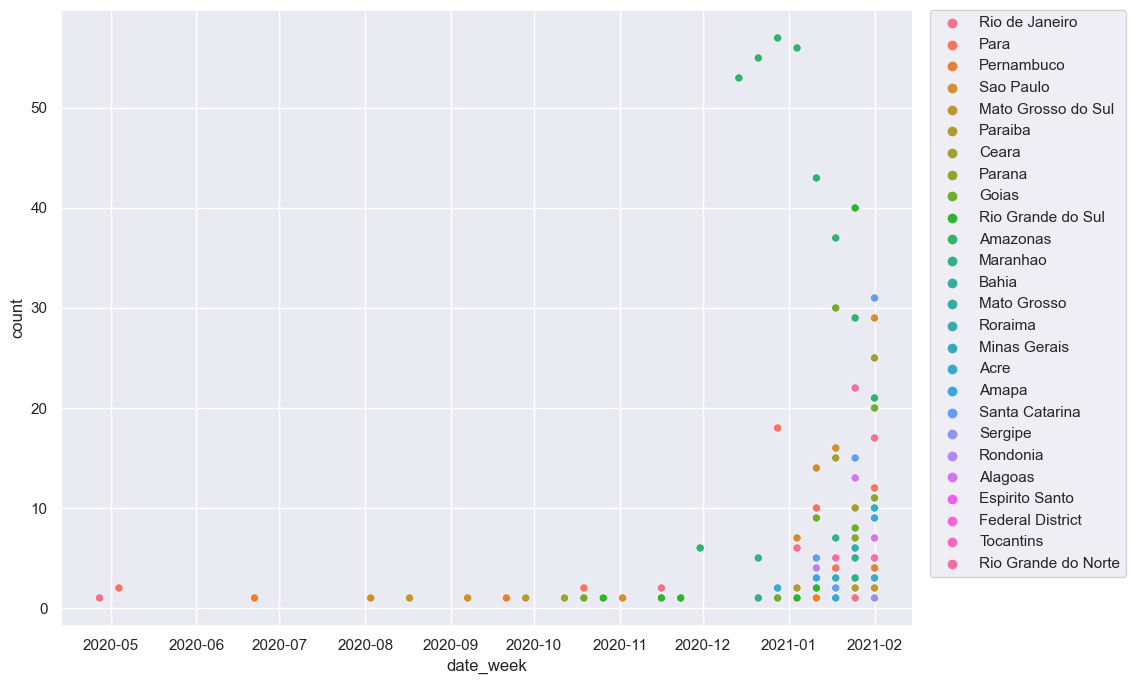

In [56]:
#Visualização de caso no tempo por estado (casos em uma mesma semana)
sns.set(rc={'figure.figsize':(11,8)})
sns.scatterplot(data=df_vis, x="date_week", y="count", hue="state")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


In [ ]:
#Casos acumulados por semanas


#### Ranqueando

In [82]:
#Ranqueamento baseado no primeiro caso reportado
df_occ_1 = df.groupby('state').agg({'Collection date': 'min'}).reset_index()
df_occ_1.sort_values('Collection date', inplace=True)
df_occ_1.insert(0, 'rank', range(1, 1 + len(df_occ_1)))
df_occ_1

,rank,state,Collection date
20,1,Rio de Janeiro,2020-04-29
13,2,Para,2020-05-06
16,3,Pernambuco,2020-06-23
24,4,Sao Paulo,2020-08-07
11,5,Mato Grosso do Sul,2020-08-24
14,6,Paraiba,2020-10-01
5,7,Ceara,2020-10-14
8,8,Goias,2020-10-26
15,9,Parana,2020-10-26
19,10,Rio Grande do Sul,2020-11-01
